# Pricing Test

## Goal


Pricing optimization is, non surprisingly, another area where data science can provide huge value.

The goal here is to evaluate whether a pricing test running on the site has been successful. As always, you should focus on user segmentation and provide insights about segments who behave differently as well as any other insights you might find.


## Challenge Description


Company XYZ sells a software for \$39. Since revenue has been flat for some time, the VP of Product has decided to run a test increasing the price. She hopes that this would increase revenue. In the experiment, 66 \% of the users have seen the old price (\$39), while a random sample of 33% users a higher price ($59).

The test has been running for some time and the VP of Product is interested in understanding how it went and whether it would make sense to increase the price for all the users.

Especially, you were asked the following questions:

-- Should the company sell its software for \$39 or \$59?

-- The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main findings looking at the data?

-- [Bonus] The VP of Product feels that the test has been running for too long and they should have been able to get statistically significant results in a shorter time. Do you agree with this? After how many days you would have stopped the test? Please, explain why.

In [1]:
import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

06_Pricing_Test.ipynb  test_results.csv       user_table.csv


In [3]:
df_test = pd.read_csv('test_results.csv')
df_test.head(10)

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0
5,169971,2015-04-13 12:07:08,ads-google,mobile,iOS,0,39,0
6,600150,2015-03-04 14:45:44,seo_facebook,web,windows,0,39,0
7,798371,2015-03-15 08:19:29,ads-bing,mobile,android,1,59,1
8,447194,2015-03-28 12:28:10,ads_facebook,web,windows,1,59,0
9,431639,2015-04-24 12:42:18,ads_facebook,web,windows,1,59,0


- user_id : the Id of the user. Can be joined to user_id in user_table

- timestamp : the date and time when the user hit for the first time company XYZ webpage. It is in user local time

- source : marketing channel that led to the user coming to the site. It can be:
  ads-[“google”, “facebook”, “bing”, “yahoo”, “other”]. That is, user coming from google ads, yahoo ads, etc.
  seo - [“google”, “facebook”, “bing”, “yahoo”, “other”]. That is, user coming from google search, yahoo, facebook, etc.
  friend_referral : user coming from a referral link of another user
  direct_traffic: user coming by directly typing the address of the site on the browser

- device : user device. Can be mobile or web.

- operative_system : user operative system. Can be: “windows”, “linux”, “mac” for web, and “android”, “iOS” for mobile. "Other" if it is none of the above

- test: whether the user was in the test (i.e. 1 -> higher price) or in control (0 -> old/lower price)

- price : the price the user sees. It should match test

- converted : whether the user converted (i.e. 1 -> bought the software) or not (0 -> left the site without buying it).

In [4]:
df_user = pd.read_csv('user_table.csv')
df_user.head(10)

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68
5,229234,New York,USA,40.67,-73.94
6,339138,Durham,USA,35.98,-78.91
7,270353,New York,USA,40.67,-73.94
8,166748,Burke,USA,38.78,-77.27
9,167700,New York,USA,40.67,-73.94


- user_id : the Id of the user. Can be joined to user_id in test_results table
- city : the city where the user is located. Comes from the user ip address
- country : in which country the city is located
- lat : city latitude - should match user city
- long : city longitude - should match user city

In [5]:
print(df_test.shape)
print(df_user.shape)

(316800, 8)
(275616, 5)


## Data Cleaning 

In [6]:
df_test.isnull().sum()

user_id             0
timestamp           0
source              0
device              0
operative_system    0
test                0
price               0
converted           0
dtype: int64

In [7]:
df_user.isnull().sum()

user_id    0
city       0
country    0
lat        0
long       0
dtype: int64

In [8]:
df_combine = pd.merge(df_test, df_user, how = 'left', on = 'user_id')
df_combine.head(10)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02
5,169971,2015-04-13 12:07:08,ads-google,mobile,iOS,0,39,0,New York,USA,40.67,-73.94
6,600150,2015-03-04 14:45:44,seo_facebook,web,windows,0,39,0,NaN,NaN,NaN,NaN
7,798371,2015-03-15 08:19:29,ads-bing,mobile,android,1,59,1,East Orange,USA,40.77,-74.21
8,447194,2015-03-28 12:28:10,ads_facebook,web,windows,1,59,0,Dayton,USA,39.78,-84.20
9,431639,2015-04-24 12:42:18,ads_facebook,web,windows,1,59,0,Richmond,USA,37.53,-77.47


In [9]:
df_combine.isnull().sum()

user_id                 0
timestamp               0
source                  0
device                  0
operative_system        0
test                    0
price                   0
converted               0
city                41184
country             41184
lat                 41184
long                41184
dtype: int64

In [10]:
df_combine[['price','test','user_id']].groupby(['price','test']).count()

user_id
price test         
39    0      202517
      1         155
59    0         210
      1      113918

There is error data, need to remove price == 39 with test == 1 and price == 59 but test == 0:

In [11]:
df_combine = df_combine[((df_combine.price == 39) & (df_combine.test == 0)) | 
          ((df_combine.price == 59) & (df_combine.test == 1))]

df_combine[['price','test','user_id']].groupby(['price','test']).count()

,,user_id
price,test,
39,0,202517
59,1,113918


### add revenue column

In [12]:
df_combine['revenue'] = df_combine.price * df_combine.converted
df_combine.head(10)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0
5,169971,2015-04-13 12:07:08,ads-google,mobile,iOS,0,39,0,New York,USA,40.67,-73.94,0
6,600150,2015-03-04 14:45:44,seo_facebook,web,windows,0,39,0,NaN,NaN,NaN,NaN,0
7,798371,2015-03-15 08:19:29,ads-bing,mobile,android,1,59,1,East Orange,USA,40.77,-74.21,59
8,447194,2015-03-28 12:28:10,ads_facebook,web,windows,1,59,0,Dayton,USA,39.78,-84.20,0
9,431639,2015-04-24 12:42:18,ads_facebook,web,windows,1,59,0,Richmond,USA,37.53,-77.47,0


## Visualization

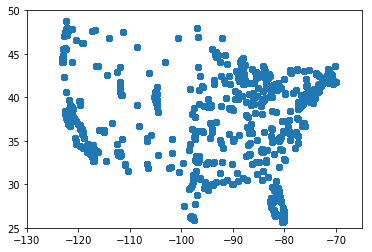

In [13]:
# Plot cities in the US map.

plt.scatter(df_user.loc[df_user['country']=='USA','long'],df_user.loc[df_user['country']=='USA','lat'])
plt.xlim([-130,-65])
plt.ylim([25,50])
plt.show()

### Source

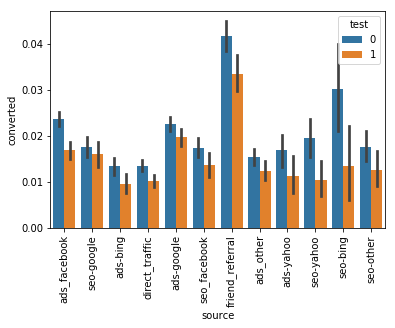

In [14]:
sns.barplot(x='source', y='converted', hue='test', data=df_combine)
plt.xticks(rotation=90)
plt.show()

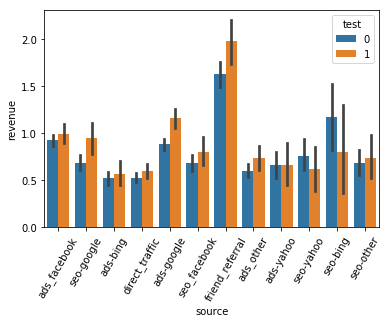

In [15]:
sns.barplot(x='source', y='revenue', hue='test', data=df_combine)
plt.xticks(rotation=60)
plt.show()

### Device

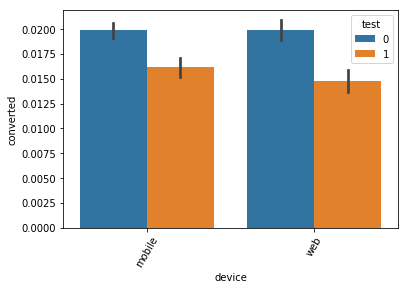

In [16]:
sns.barplot(x='device', y='converted', hue='test', data=df_combine)
plt.xticks(rotation=60)
plt.show()

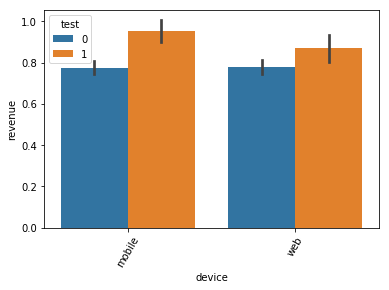

In [17]:
sns.barplot(x='device', y='revenue', hue='test', data=df_combine)
plt.xticks(rotation=60)
plt.show()

### Operative System

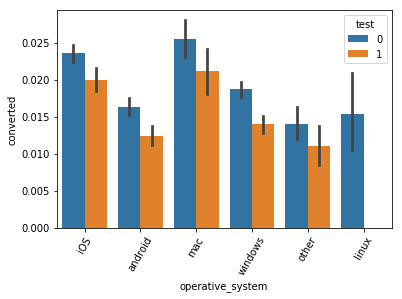

In [18]:
sns.barplot(x='operative_system', y='converted', hue='test', data=df_combine)
plt.xticks(rotation=60)
plt.show()

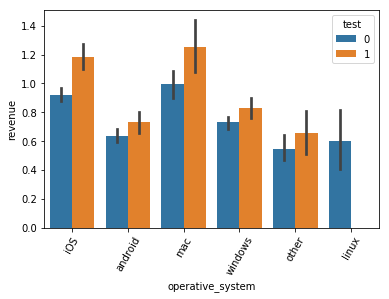

In [19]:
sns.barplot(x='operative_system', y='revenue', hue='test', data=df_combine)
plt.xticks(rotation=60)
plt.show()

In [20]:
df_combine[df_combine.operative_system == 'linux'].converted.value_counts()

0    4096
1      34
Name: converted, dtype: int64

## Question 1: 

Should the company sell its software for \$39 or \$59?

In [21]:
print("$39 total converted:", df_combine[df_combine.price == 39].converted.sum())
print("$39 conversion rate:", df_combine[df_combine.price == 39].converted.mean())
print("$59 total converted:", df_combine[df_combine.price == 59].converted.sum())
print("$59 conversion rate:", df_combine[df_combine.price == 59].converted.mean())

$39 total converted: 4030
$39 conversion rate: 0.019899563987220825
$59 total converted: 1772
$59 conversion rate: 0.01555504836812444


It is hard to say if there is significant difference between the two conversion rates. I need to carry out a t-test.

In [22]:
from scipy import stats

control = df_combine[df_combine.price == 39].converted
test = df_combine[df_combine.price == 59].converted

stat,pvalue = stats.ttest_ind(test, control, equal_var=False)
print("p-value is: ", pvalue)

p-value is:  1.5119397664466364e-19


The tiny low p-value means that we need to reject the nll hypothesi, so 39 and 59 different prices give different conversion rate. Increasing the price from \$39 to \$59 decreases conversion rate. 

In [23]:
print("$39 total revenue:", df_combine[df_combine.price == 39].revenue.sum())
print("$39 average revenue:", df_combine[df_combine.price == 39].revenue.mean())
print("$59 total revenue:", df_combine[df_combine.price == 59].revenue.sum())
print("$59 average revenue:", df_combine[df_combine.price == 59].revenue.mean())

$39 total revenue: 157170
$39 average revenue: 0.7760829955016122
$59 total revenue: 104548
$59 average revenue: 0.917747853719342


The average \$59 revenue is actually higher than \$39. I do t-test again:

In [24]:
control = df_combine[df_combine.price == 39].revenue
test = df_combine[df_combine.price == 59].revenue

stat,pvalue = stats.ttest_ind(test, control, equal_var=False)
print("p-value is: ", pvalue)

p-value is:  1.0972577312420781e-08


So the t-test suggest that \$59 price can give us higher average revenue. However, more dicussion and feature selection needed to be given below.

## Question 2: 

The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main findings looking at the data?

### Source

In [25]:
df_source = df_combine.groupby('source')['converted'].mean().reset_index()
df_source

,source,converted
0,ads-bing,0.012001
1,ads-google,0.021502
2,ads-yahoo,0.014793
3,ads_facebook,0.021198
4,ads_other,0.014350
5,direct_traffic,0.012294
6,friend_referral,0.038688
7,seo-bing,0.023787
8,seo-google,0.016978
9,seo-other,0.015686


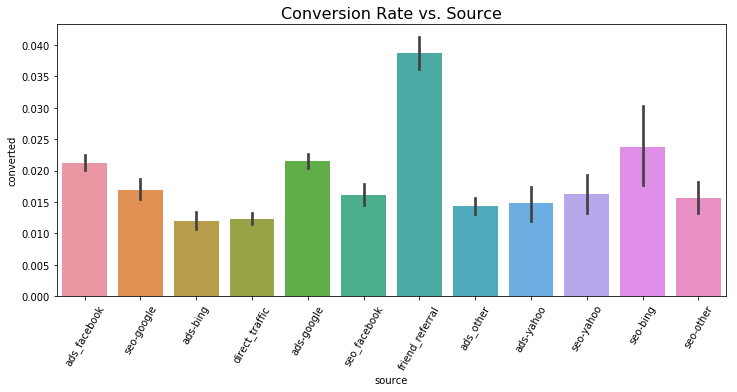

In [26]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='source', y='converted', data=df_combine, ax=ax)
ax.set_title('Conversion Rate vs. Source', fontsize=16)
plt.xticks(rotation=60)
plt.show()

In [27]:
sources = list(df_source.source.unique())

test0 = []
test1 = []
pvalue_list = []

for source in sources:
    control = df_combine[(df_combine.source == source) & (df_combine.test == 0)].converted
    test = df_combine[(df_combine.source == source) & (df_combine.test == 1)].converted
    test0.append(control.mean())
    test1.append(test.mean())
    stat,pvalue = stats.ttest_ind(test, control, equal_var=False)
    pvalue_list.append(pvalue)

In [28]:
df_source['control'] = test0
df_source['test'] = test1
df_source['pvalue'] = pvalue_list
df_source

,source,converted,control,test,pvalue
0,ads-bing,0.012001,0.013371,0.009579,8.180061e-03
1,ads-google,0.021502,0.022566,0.019631,1.577557e-02
2,ads-yahoo,0.014793,0.016833,0.011236,4.059121e-02
3,ads_facebook,0.021198,0.023654,0.016856,4.202333e-08
4,ads_other,0.014350,0.015424,0.012394,2.988304e-02
5,direct_traffic,0.012294,0.013510,0.010111,1.571792e-04
6,friend_referral,0.038688,0.041689,0.033479,2.425330e-03
7,seo-bing,0.023787,0.030098,0.013497,7.395222e-03
8,seo-google,0.016978,0.017497,0.016005,3.961789e-01
9,seo-other,0.015686,0.017520,0.012481,4.975159e-02


### Device

In [29]:
df_device = df_combine.groupby('device')['converted'].mean().reset_index()
df_device

,device,converted
0,mobile,0.018554
1,web,0.018023


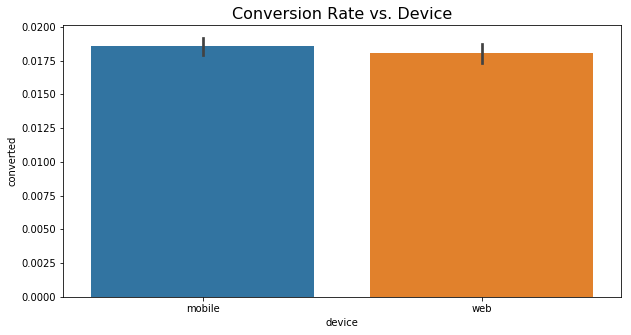

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='device', y='converted', data=df_combine, ax=ax)
ax.set_title('Conversion Rate vs. Device', fontsize=16)
#plt.xticks(rotation=60)
plt.show()

In [31]:
devices = list(df_device.device.unique())

test0 = []
test1 = []
pvalue_list = []

for device in devices:
    control = df_combine[(df_combine.device == device) & (df_combine.test == 0)].converted
    test = df_combine[(df_combine.device == device) & (df_combine.test == 1)].converted
    test0.append(control.mean())
    test1.append(test.mean())
    stat,pvalue = stats.ttest_ind(test, control, equal_var=False)
    pvalue_list.append(pvalue)

In [32]:
df_device['control'] = test0
df_device['test'] = test1
df_device['pvalue'] = pvalue_list
df_device

,device,converted,control,test,pvalue
0,mobile,0.018554,0.019872,0.016146,4.358664e-09
1,web,0.018023,0.019940,0.014744,1.582249e-12


### City

In [33]:
df_city = df_combine.groupby('city')['converted'].mean().reset_index()
df_city = df_city.sort_values('converted',ascending=False).reset_index()
df_city

,index,city,converted
0,561,North Atlanta,0.200000
1,135,Catonsville,0.153846
2,708,Saint Charles,0.142857
3,611,Parkway-South Sacramento,0.117647
4,280,Findlay,0.111111
5,77,Blue Springs,0.095238
6,81,Bonita Springs,0.090909
7,447,Lehigh Acres,0.086957
8,613,Parsippany-Troy Hills Township,0.081081
9,801,Sun City,0.078652


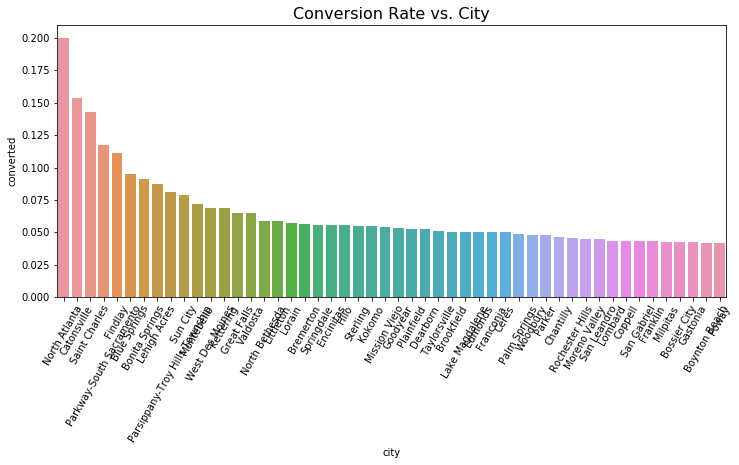

In [34]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='city', y='converted', data=df_city[:50], ax=ax)
ax.set_title('Conversion Rate vs. City', fontsize=16)
plt.xticks(rotation=60)
plt.show()

In [35]:
df_city = df_city[:300]

In [36]:
cities = list(df_city.city.unique())

test0 = []
test1 = []
pvalue_list = []

i = 0
for city in cities:
    control = df_combine[(df_combine.city == city) & (df_combine.test == 0)].converted
    test = df_combine[(df_combine.city == city) & (df_combine.test == 1)].converted
    test0.append(control.mean())
    test1.append(test.mean())
    stat,pvalue = stats.ttest_ind(test, control, equal_var=False)
    pvalue_list.append(pvalue)
    
    if i%30 == 0:
        print(i)
    
    i +=1

0
30
60
90
120
150
180
210
240
270


In [37]:
df_city['control'] = test0
df_city['test'] = test1
df_city['pvalue'] = pvalue_list
df_city

,index,city,converted,control,test,pvalue
0,561,North Atlanta,0.200000,0.000000,0.250000,NaN
1,135,Catonsville,0.153846,0.250000,0.000000,0.040969
2,708,Saint Charles,0.142857,0.200000,0.000000,0.373901
3,611,Parkway-South Sacramento,0.117647,0.181818,0.000000,0.166890
4,280,Findlay,0.111111,0.000000,0.166667,0.363217
5,77,Blue Springs,0.095238,0.066667,0.166667,0.595665
6,81,Bonita Springs,0.090909,0.250000,0.000000,0.391002
7,447,Lehigh Acres,0.086957,0.000000,0.210526,0.041861
8,613,Parsippany-Troy Hills Township,0.081081,0.074074,0.100000,0.820938
9,801,Sun City,0.078652,0.109375,0.000000,0.007129


In [38]:
# Some cities do not have enough data, like this:

df_combine[(df_combine.city == 'Catonsville') & (df_combine.test == 1)]

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue
22860,588191,2015-05-01 21:23:45,ads_other,web,windows,1,59,0,Catonsville,USA,39.26,-76.74,0
62202,849986,2015-04-08 10:35:25,seo_facebook,mobile,iOS,1,59,0,Catonsville,USA,39.26,-76.74,0
74145,475655,2015-05-22 10:25:34,direct_traffic,mobile,iOS,1,59,0,Catonsville,USA,39.26,-76.74,0
89475,989774,2015-05-22 10:25:34,direct_traffic,mobile,iOS,1,59,0,Catonsville,USA,39.26,-76.74,0
167439,619481,2015-04-24 12:18:19,ads-bing,mobile,iOS,1,59,0,Catonsville,USA,39.26,-76.74,0
180642,747157,2015-05-01 21:23:45,ads_other,web,windows,1,59,0,Catonsville,USA,39.26,-76.74,0
181937,470359,2015-05-01 21:23:45,ads_other,web,windows,1,59,0,Catonsville,USA,39.26,-76.74,0
207508,696814,2015-04-08 10:35:25,seo_facebook,mobile,iOS,1,59,0,Catonsville,USA,39.26,-76.74,0
247234,9954,2015-04-24 12:18:19,ads-bing,mobile,iOS,1,59,0,Catonsville,USA,39.26,-76.74,0
281832,58817,2015-05-01 21:23:45,ads_other,web,windows,1,59,0,Catonsville,USA,39.26,-76.74,0


In [39]:
df_country = df_combine.groupby('country')['converted'].mean().reset_index()
df_country 

,country,converted
0,USA,0.018213


In [40]:
df_combine.country.unique()

array(['USA', nan], dtype=object)